#Assignment 1 (Project Phase 1)

##Group Name: **Data Dreamers**

- Dataset: Road Traffic Accident Dataset, Rawalpindi-Punjab, Pakistan
- Two possible targets- ***Injury Type*** or ***Patient Status***


# Imports

In [369]:
import pandas as pd
import numpy as numpy
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer
from sklearn.impute import SimpleImputer
import seaborn as sns

## Data Import

In [370]:
df = pd.read_csv('/content/RTA Data 2020 to July 2023.csv')

<ipython-input-370-c93f1944acf5>:1: DtypeWarning: Columns (0,1,4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/RTA Data 2020 to July 2023.csv')


In [371]:
df.shape

(46189, 25)

## Data first 5 rows

In [372]:
df.head(5)

,EcYear,EcNumber,CallTime,EmergencyArea,TotalPatientsInEmergency,Gender,Age,HospitalName,Reason,responsetime,...,BikesInvolved,BusesInvolved,CarsInvolved,CartInvovled,RickshawsInvolved,TractorInvovled,TrainsInvovled,TrucksInvolved,VansInvolved,OthersInvolved
0,2020,31486,12/31/20 22:41,NEAR APS SCHOOL FORT ROAD RWP,1,Male,27.0,BBH,Bike Slip,10.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2020,31485,12/31/20 22:25,"Infront of Daig.com, Near Dha gate 2, gt road...",1,Male,20.0,NaN,Car hit Footpath,12.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2020,31483,12/31/20 21:54,Muhammadi chowk arshad bakery khyaban e sirsye...,1,Male,48.0,BBH,Rickshaw hit with Car,10.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,2020,31482,12/31/20 21:24,"Gulzar e quaid, T/W Katcheri Near Attock Pump,...",1,Male,45.0,NaN,Car hit Car and runaway,5.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2020,31479,12/31/20 21:03,Taaj Company Gawalmandi Chowk Liaqat Baag Road...,1,Male,22.0,NaN,Unknown Bike hit Bike and runaway,5.0,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#Selecting Our Target Variable

- For this assignment, we have selected **Injury Type** as the target variable.



In [373]:
# Missing values
df.isnull().sum()

,0
EcYear,0
EcNumber,7211
CallTime,5956
EmergencyArea,0
TotalPatientsInEmergency,0
Gender,1
Age,1
HospitalName,21950
Reason,1
responsetime,5


In [374]:
df['PatientStatus'].value_counts()

,count
PatientStatus,
Alive & unstable,23788
Alive & stable,21812
Dead,587


In [375]:
df['InjuryType'].value_counts()

,count
InjuryType,
Minor,34788
Single Fracture,6737
Head Injury,3503
Multiple Fractures,778
Spinal Injury,381


#Droping Features



In [376]:
df['EcNumber'].value_counts()


,count
EcNumber,
598,2
256,2
21582,2
246,2
247,2
...,...
13946,1
13949,1
13951,1


##EcNumber Correlation check

<ipython-input-377-bfdc03dd7a89>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sub['EcNumber'] = df_sub['EcNumber'].astype('category').cat.codes
<ipython-input-377-bfdc03dd7a89>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sub['InjuryType'] = df_sub['InjuryType'].astype('category').cat.codes
<ipython-input-377-bfdc03dd7a89>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

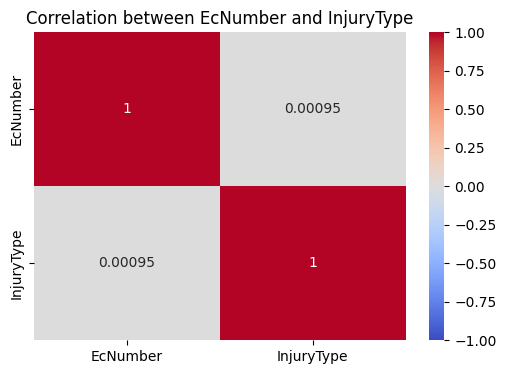

In [377]:
df_sub = df[['EcNumber', 'InjuryType']]

df_sub['EcNumber'] = df_sub['EcNumber'].astype('category').cat.codes
df_sub['InjuryType'] = df_sub['InjuryType'].astype('category').cat.codes
df_sub.dropna(inplace=True)
correlation = df_sub[['EcNumber', 'InjuryType']].corr()

# Plot heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(correlation, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation between EcNumber and InjuryType')
plt.show()

##HospitalName Correlation check

In [378]:
df['HospitalName'].value_counts()

,count
HospitalName,
BBH,6953
DHQ,6099
PIMS,1663
"RHC,Mandra,Rawalpindi",1655
Wah General Hospital,1231
...,...
"THQ, Fateh Jang",1
"Nissa Nursing Home, Rawalpindi",1
"Nadeem Clinic, Rwp",1


<ipython-input-379-9475f606c843>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sub['HospitalName'] = df_sub['HospitalName'].astype('category').cat.codes
<ipython-input-379-9475f606c843>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sub['InjuryType'] = df_sub['InjuryType'].astype('category').cat.codes
<ipython-input-379-9475f606c843>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas

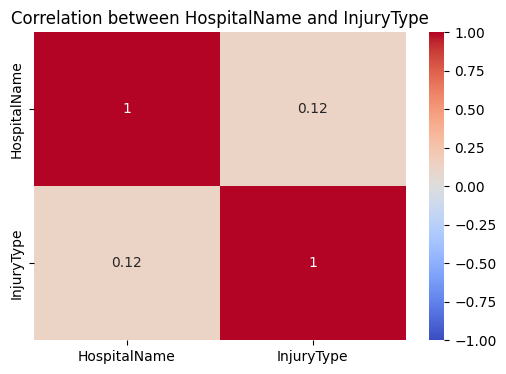

In [379]:
df_sub = df[['HospitalName', 'InjuryType']]

df_sub['HospitalName'] = df_sub['HospitalName'].astype('category').cat.codes
df_sub['InjuryType'] = df_sub['InjuryType'].astype('category').cat.codes
df_sub.dropna(inplace=True)
correlation = df_sub[['HospitalName', 'InjuryType']].corr()

# Plot heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(correlation, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation between HospitalName and InjuryType')
plt.show()

##PatientStatus Correlation check

In [380]:
df['PatientStatus'].value_counts()

,count
PatientStatus,
Alive & unstable,23788
Alive & stable,21812
Dead,587


<ipython-input-381-8ba49f3ac9d1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sub['PatientStatus'] = df_sub['PatientStatus'].astype('category').cat.codes
<ipython-input-381-8ba49f3ac9d1>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sub['InjuryType'] = df_sub['InjuryType'].astype('category').cat.codes
<ipython-input-381-8ba49f3ac9d1>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pand

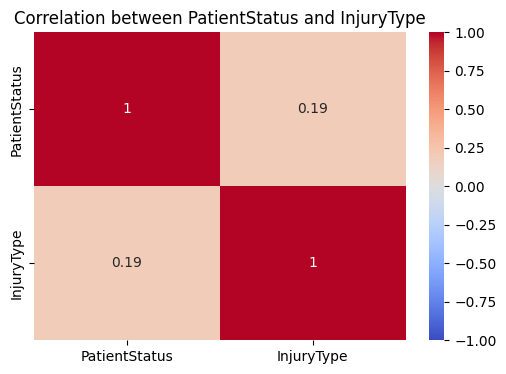

In [381]:
df_sub = df[['PatientStatus', 'InjuryType']]

df_sub['PatientStatus'] = df_sub['PatientStatus'].astype('category').cat.codes
df_sub['InjuryType'] = df_sub['InjuryType'].astype('category').cat.codes
df_sub.dropna(inplace=True)
correlation = df_sub[['PatientStatus', 'InjuryType']].corr()

# Plot heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(correlation, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation between PatientStatus and InjuryType')
plt.show()

##CallTime Correlation check

In [382]:
df['CallTime'].value_counts()

,count
CallTime,
1/3/21 10:07,3
9/30/20 13:35,3
12/3/20 19:58,2
10/13/20 8:36,2
9/24/22 21:07,2
...,...
8/29/21 13:23,1
8/29/21 13:07,1
8/29/21 13:04,1


<ipython-input-383-dc3d4d6f036d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sub['CallTime'] = df_sub['CallTime'].astype('category').cat.codes
<ipython-input-383-dc3d4d6f036d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sub['InjuryType'] = df_sub['InjuryType'].astype('category').cat.codes
<ipython-input-383-dc3d4d6f036d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

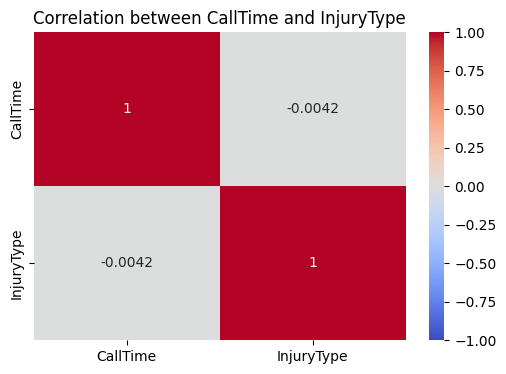

In [383]:
df_sub = df[['CallTime', 'InjuryType']]

df_sub['CallTime'] = df_sub['CallTime'].astype('category').cat.codes
df_sub['InjuryType'] = df_sub['InjuryType'].astype('category').cat.codes
df_sub.dropna(inplace=True)
correlation = df_sub[['CallTime', 'InjuryType']].corr()

# Plot heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(correlation, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation between CallTime and InjuryType')
plt.show()

##EcYear Correlation check

In [384]:
df['EcYear'].value_counts()

,count
EcYear,
2021,12677
2020,11382
2023,9227
2022,8708
2022,4194
Hospital,1


<ipython-input-385-e3ab9b014bb8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sub['EcYear'] = df_sub['EcYear'].astype('category').cat.codes
<ipython-input-385-e3ab9b014bb8>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sub['InjuryType'] = df_sub['InjuryType'].astype('category').cat.codes
<ipython-input-385-e3ab9b014bb8>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable

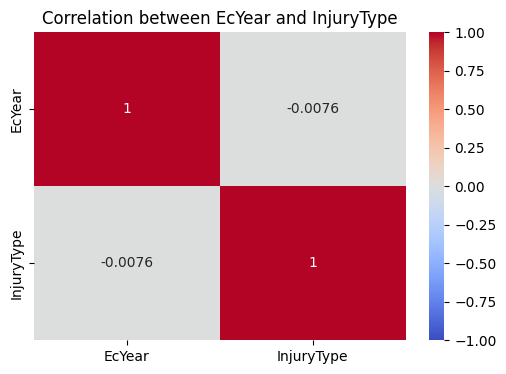

In [385]:
df_sub = df[['EcYear', 'InjuryType']]

df_sub['EcYear'] = df_sub['EcYear'].astype('category').cat.codes
df_sub['InjuryType'] = df_sub['InjuryType'].astype('category').cat.codes
df_sub.dropna(inplace=True)
correlation = df_sub[['EcYear', 'InjuryType']].corr()

# Plot heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(correlation, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation between EcYear and InjuryType')
plt.show()

##Info

` EcNumber, HospitalName, EcYear, PatientStatus and CallTime were removed as they do not exhibit any significant correlation with the target variable.`



In [386]:
df = df.drop(['EcNumber', 'HospitalName', 'EcYear','PatientStatus', 'CallTime'], axis=1)

In [387]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46189 entries, 0 to 46188
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmergencyArea             46189 non-null  object 
 1   TotalPatientsInEmergency  46189 non-null  object 
 2   Gender                    46188 non-null  object 
 3   Age                       46188 non-null  float64
 4   Reason                    46188 non-null  object 
 5   responsetime              46184 non-null  float64
 6   EducationTitle            46188 non-null  object 
 7   InjuryType                46187 non-null  object 
 8   Cause                     46187 non-null  object 
 9   BicycleInvovled           46187 non-null  float64
 10  BikesInvolved             46187 non-null  float64
 11  BusesInvolved             46187 non-null  float64
 12  CarsInvolved              46187 non-null  float64
 13  CartInvovled              46187 non-null  float64
 14  Ricksh

#Filling the Missing Values


In [388]:
#missing values
df.isnull().sum()

,0
EmergencyArea,0
TotalPatientsInEmergency,0
Gender,1
Age,1
Reason,1
responsetime,5
EducationTitle,1
InjuryType,2
Cause,2
BicycleInvovled,2


##Handling Missing Values
`While several columns contain missing values, the number of missing entries is relatively low, with a maximum of 5 missing values in the **responseTime** column. Given the small number of missing values, it is not a significant issue. To address this, we can apply a forward fill technique, which propagates the last valid observation to the next missing one. In this case, we have opted for the forward fill method to handle the missing values efficiently.`

In [389]:
forwardfill = [
    'Reason', 'responsetime', 'EducationTitle', 'InjuryType', 'Cause',
    'BicycleInvovled', 'BikesInvolved', 'BusesInvolved', 'CarsInvolved',
    'CartInvovled', 'RickshawsInvolved', 'TractorInvovled', 'TrainsInvovled',
    'TrucksInvolved', 'VansInvolved', 'OthersInvolved', 'Age','Gender'
]


df[forwardfill] = df[forwardfill].fillna(method='ffill')


df.isnull().sum()

<ipython-input-389-05988a5f2a05>:9: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[forwardfill] = df[forwardfill].fillna(method='ffill')


,0
EmergencyArea,0
TotalPatientsInEmergency,0
Gender,0
Age,0
Reason,0
responsetime,0
EducationTitle,0
InjuryType,0
Cause,0
BicycleInvovled,0


In [390]:
df[df.duplicated()]

,EmergencyArea,TotalPatientsInEmergency,Gender,Age,Reason,responsetime,EducationTitle,InjuryType,Cause,BicycleInvovled,BikesInvolved,BusesInvolved,CarsInvolved,CartInvovled,RickshawsInvolved,TractorInvovled,TrainsInvovled,TrucksInvolved,VansInvolved,OthersInvolved
745,Near sehal village chakri road Rwp,4,Male,42.0,same,8.0,Matric,Minor,Carelessness,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1546,Infront of ashraf marriage hall dhoke hafiz ...,3,Male,16.0,same,3.0,Matric,Minor,Over Speed,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5990,"Mohri Khadran Stop, Near Pakistan Copoperative...",6,Male,18.0,same,20.0,Primary,Minor,Over Speed,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
6037,Near flying Club Old airport road rwp,3,Male,18.0,Same,7.0,Primary,Minor,Over Speed,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8301,Main Ali Nawaz Chowk Khatarnaak More Rawal Roa...,5,Male,17.0,same,7.0,Matric,Minor,Over Speed,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9573,Infront Of BAwali Hotel T/W Mandra GT Road Guj...,4,Male,50.0,same,6.0,Primary,Minor,U Turn,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
11314,"Dhoke Muqadam Stop, Near Attock Pump/ LRBT, G ...",5,Female,45.0,Same,7.0,Middle,Minor,Over Speed,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
12518,ranial near ranial choki chakri road rwp,4,Male,27.0,Same,8.0,Illetrate,Minor,Over Speed,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
17488,"NEAR BRIDGE,BHARIATOWN PHASE 1,NEAR SIFFARI VI...",3,Male,18.0,Same,12.0,Primary,Minor,Carelessness,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20119,"Rawal road t/w ali nawaz, rwp",5,Male,36.0,same,6.0,Illetrate,Minor,Over Speed,0.0,1.0,0.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [391]:
df.duplicated().sum()

30

#Encoding the categorical columns

In [392]:
df.drop_duplicates(inplace =True)

In [393]:
 df.shape

(46159, 20)

In [394]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 46159 entries, 0 to 46188
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmergencyArea             46159 non-null  object 
 1   TotalPatientsInEmergency  46159 non-null  object 
 2   Gender                    46159 non-null  object 
 3   Age                       46159 non-null  float64
 4   Reason                    46159 non-null  object 
 5   responsetime              46159 non-null  float64
 6   EducationTitle            46159 non-null  object 
 7   InjuryType                46159 non-null  object 
 8   Cause                     46159 non-null  object 
 9   BicycleInvovled           46159 non-null  float64
 10  BikesInvolved             46159 non-null  float64
 11  BusesInvolved             46159 non-null  float64
 12  CarsInvolved              46159 non-null  float64
 13  CartInvovled              46159 non-null  float64
 14  RickshawsIn

##Data Type Conversion
Upon reviewing the data types in the dataframe, we observe that the following columns are of object type:

* EcYear
* EmergencyArea
* Gender
* Reason
* EducationTitle
* InjuryType
* Cause
* PatientStatus

Since machine learning models require numerical data, these categorical columns must be transformed into numerical format through encoding techniques. We will apply appropriate encoding methods to convert these columns into numerical values, making them suitable for analysis and modeling.

## Ordinal Encoding

In [395]:
df['EducationTitle'].value_counts()

,count
EducationTitle,
Matric,15688
Primary,11713
Illetrate,10834
Intermediate,5673
Graduation,1684
Masters,439
Middle,118
PHD,9
0,1


###Info

```
For the columns EducationTitle, we will apply Ordinal Encoding,
because these features have a strong inherent order:

- EducationTitle represents educational level that follows a defined hierarchy (PhD < Master < Primary < Matric).
By using ordinal encoding, we can capture the meaningful order in these features.
```



###EducationTitle Visualization Bar chart




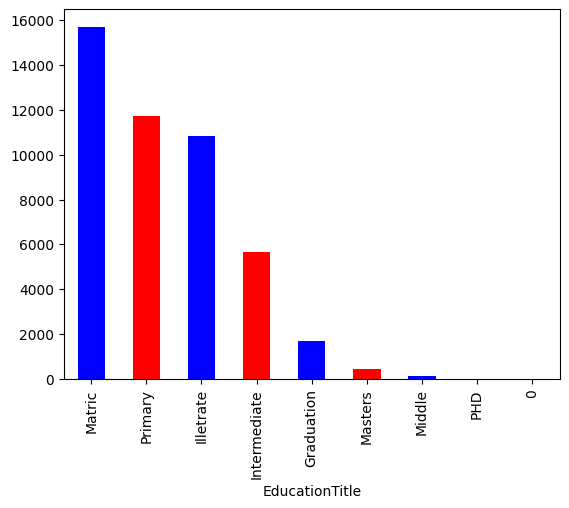

In [396]:

df['EducationTitle'].value_counts().plot(kind='bar', color=['blue', 'red'])


plt.show()

###EducationTitle encoding

In [397]:
df['EducationTitle'] = encoder.fit_transform(df[['EducationTitle']])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 46159 entries, 0 to 46188
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmergencyArea             46159 non-null  object 
 1   TotalPatientsInEmergency  46159 non-null  object 
 2   Gender                    46159 non-null  object 
 3   Age                       46159 non-null  float64
 4   Reason                    46159 non-null  object 
 5   responsetime              46159 non-null  float64
 6   EducationTitle            46159 non-null  int64  
 7   InjuryType                46159 non-null  object 
 8   Cause                     46159 non-null  object 
 9   BicycleInvovled           46159 non-null  float64
 10  BikesInvolved             46159 non-null  float64
 11  BusesInvolved             46159 non-null  float64
 12  CarsInvolved              46159 non-null  float64
 13  CartInvovled              46159 non-null  float64
 14  RickshawsIn

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


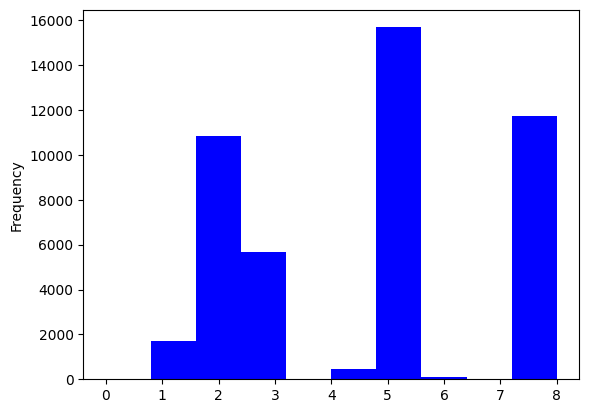

In [398]:
df['EducationTitle'].plot(kind='hist', color=['blue'])


plt.show()

###EducationTitle Visualization Box plot

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


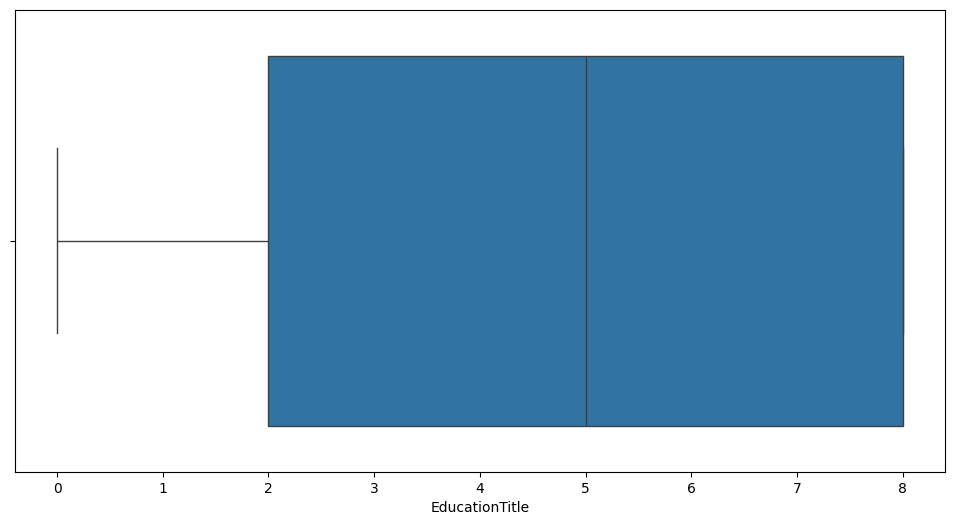

In [399]:
#boxplot for column EducationTitle
plt.figure(figsize=(12, 6))
sns.boxplot(x=df['EducationTitle'])

plt.show()

In [400]:

Q1 = df['EducationTitle'].quantile(0.25)
Q3 = df['EducationTitle'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)

outliers = df[(df['EducationTitle'] < lower_bound) | (df['EducationTitle'] > upper_bound)]
outliers

,EmergencyArea,TotalPatientsInEmergency,Gender,Age,Reason,responsetime,EducationTitle,InjuryType,Cause,BicycleInvovled,BikesInvolved,BusesInvolved,CarsInvolved,CartInvovled,RickshawsInvolved,TractorInvovled,TrainsInvovled,TrucksInvolved,VansInvolved,OthersInvolved


###InjuryType Visualization Bar Chart

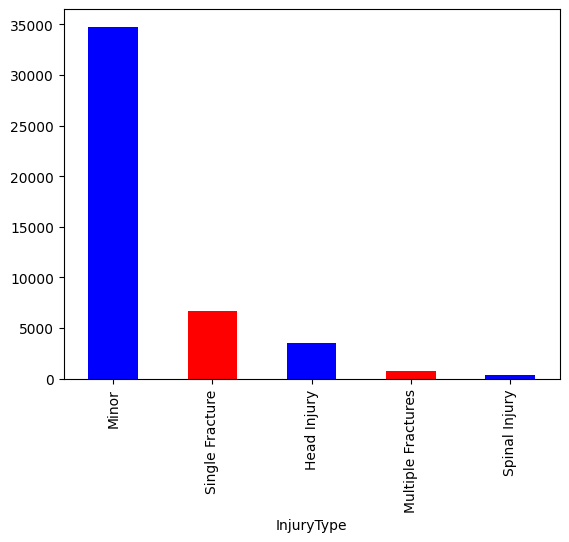

In [401]:
df['InjuryType'].value_counts().plot(kind='bar', color=['blue', 'red'])


plt.show()

###InjuryType Encoding

In [402]:
encoder = OrdinalEncoder()
df['InjuryType'] = encoder.fit_transform(df[['InjuryType']])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 46159 entries, 0 to 46188
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmergencyArea             46159 non-null  object 
 1   TotalPatientsInEmergency  46159 non-null  object 
 2   Gender                    46159 non-null  object 
 3   Age                       46159 non-null  float64
 4   Reason                    46159 non-null  object 
 5   responsetime              46159 non-null  float64
 6   EducationTitle            46159 non-null  int64  
 7   InjuryType                46159 non-null  float64
 8   Cause                     46159 non-null  object 
 9   BicycleInvovled           46159 non-null  float64
 10  BikesInvolved             46159 non-null  float64
 11  BusesInvolved             46159 non-null  float64
 12  CarsInvolved              46159 non-null  float64
 13  CartInvovled              46159 non-null  float64
 14  RickshawsIn

In [403]:
df['InjuryType'].value_counts()

,count
InjuryType,
1.0,34765
3.0,6736
0.0,3499
2.0,778
4.0,381


###InjuryType Visualization histogram


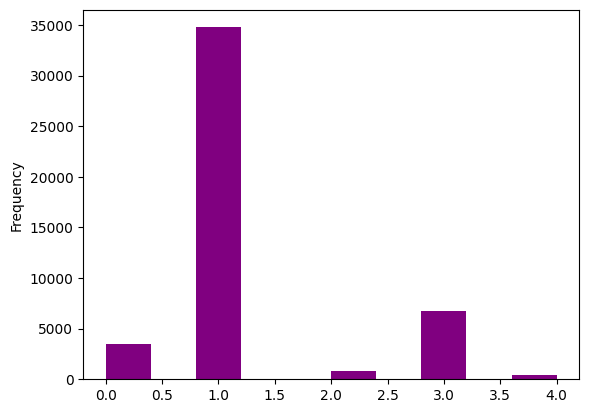

In [404]:
df['InjuryType'].plot(kind='hist', color='purple')


plt.show()

##Label Encoding

In [405]:
df['EmergencyArea'].head(2)

,EmergencyArea
0,NEAR APS SCHOOL FORT ROAD RWP
1,"Infront of Daig.com, Near Dha gate 2, gt road..."


In [406]:
df['EmergencyArea'].value_counts()

,count
EmergencyArea,
"Railway Track Underpass Nazar Chowk Near Kacheri, Rwp.",42
Cod Chowk Adyala Road Rawalpindi,38
"502 Chowk, Adyala Road, Rwp",33
Near Pc Hotel Signal Mall Road Rwp,31
"22 No. Chungi Damiyal Road, Main Chowk, Rawalpindi",29
...,...
Adra Pull Abid Majeed Road Rwp,1
Jinnah Park Railway Track Rwp,1
Abid Majeed Road Front of CSD Rwp,1


###Info

```
The EmergencyArea column contains many categories, and the frequency of each category can provide valuable
information. For example, if a patient was injured at "Railway Track Underpass Nazar Chowk Near Kacheri"
(which has a frequency of 42), they may be more likely to have severe injuries compared to a patient injured
at "Abid Majeed Road Front of CSD Rwp" (which has a frequency of 1).

Given this, we will apply Frequency Encoding to the EmergencyArea column. This encoding technique will replace
each unique location with the count of its occurrences in the dataset. This method allows us to incorporate the
importance of location frequency into the model, which can potentially reveal patterns related to injury type.
```



###EmergencyArea Encoding

In [408]:
df['EmergencyArea'].value_counts()

,count
EmergencyArea,
1,32371
2,7688
3,2220
4,832
5,595
6,384
7,273
11,209
9,207


In [407]:
encoder = LabelEncoder()
df['EmergencyArea'] = encoder.fit_transform(df['EmergencyArea'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 46159 entries, 0 to 46188
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmergencyArea             46159 non-null  int64  
 1   TotalPatientsInEmergency  46159 non-null  object 
 2   Gender                    46159 non-null  object 
 3   Age                       46159 non-null  float64
 4   Reason                    46159 non-null  object 
 5   responsetime              46159 non-null  float64
 6   EducationTitle            46159 non-null  int64  
 7   InjuryType                46159 non-null  float64
 8   Cause                     46159 non-null  object 
 9   BicycleInvovled           46159 non-null  float64
 10  BikesInvolved             46159 non-null  float64
 11  BusesInvolved             46159 non-null  float64
 12  CarsInvolved              46159 non-null  float64
 13  CartInvovled              46159 non-null  float64
 14  RickshawsIn

###EmergencyArea Visualization Box Plot

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


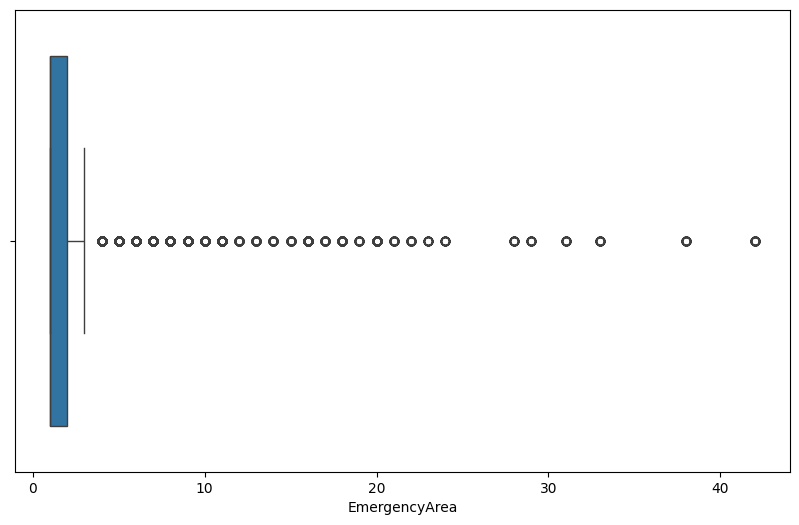

In [410]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['EmergencyArea'])

plt.show()


In [411]:
Q1 = df['EmergencyArea'].quantile(0.25)
Q3 = df['EmergencyArea'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)

outliers = df[(df['EmergencyArea'] < lower_bound) | (df['EmergencyArea'] > upper_bound)]
outliers

,EmergencyArea,TotalPatientsInEmergency,Gender,Age,Reason,responsetime,EducationTitle,InjuryType,Cause,BicycleInvovled,BikesInvolved,BusesInvolved,CarsInvolved,CartInvovled,RickshawsInvolved,TractorInvovled,TrainsInvovled,TrucksInvolved,VansInvolved,OthersInvolved
243,4,4,Male,30.0,Same,5.0,8,1.0,Over Speed,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
244,4,4,Male,38.0,Same,5.0,2,1.0,Over Speed,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
245,4,4,Male,19.0,Bike hit another Bike,5.0,2,1.0,Over Speed,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
246,4,4,Male,20.0,Same,5.0,2,1.0,Over Speed,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
323,4,4,Male,32.0,same,10.0,8,1.0,Over Speed,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46135,15,1,Male,53.0,"Due to muddy road, bike slipped , bike# S-145...",2.0,8,0.0,Carelessness,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
46138,11,1,Male,95.0,Motorcycle hitted to the pedistrian during cro...,9.0,2,3.0,Carelessness,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
46139,7,1,Male,45.0,Motor bike ( RIL 9064) key pechley tyre mein ...,9.0,3,1.0,Carelessness,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
46143,18,1,Male,20.0,As per patient he was on bike ( AWN 638 Honda...,4.0,5,3.0,Over Speed,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


###EmergencyArea Visualization Histogram

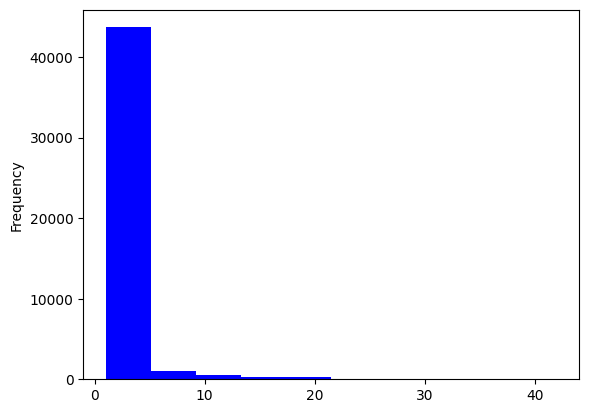

In [412]:
df['EmergencyArea'].plot(kind='hist', color=['blue', 'red'])
plt.show()

In [413]:
df['Reason'].value_counts()

,count
Reason,
same,2316
Same,1314
Bike Slipped,1223
Same,1012
Bike Slip,957
...,...
Car(FD-178 Honda Swift) Hitted the pedestrian due to over speed,1
Female motor bike pa jta hoa bike slipped hony ki wajhy sy garr gei(Rin 9043),1
Car hit another car (MRAG 734) (u4156),1


###info




```
For the Cause column, we can analyze the frequency of different causes
of injuries to capture their potential impact. For instance, if the cause of injury is "Over Speeding" (with a frequency of 29586),
 it may indicate a higher likelihood of severe injuries compared to a cause like "Wrong Turn"
(which has a frequency of 845).

Given this, we will apply Frequency Encoding to the Cause column. This encoding technique will replace each
unique cause with the count of its occurrences in the dataset.
```



In [416]:
df['Cause'].value_counts()

,count
Cause,
Over Speed,29567
Carelessness,14169
U Turn,933
Wrong Turn,841
Tyre Burst,481
Others,104
One Wheeling,64


###Cause Visualization Bar chart




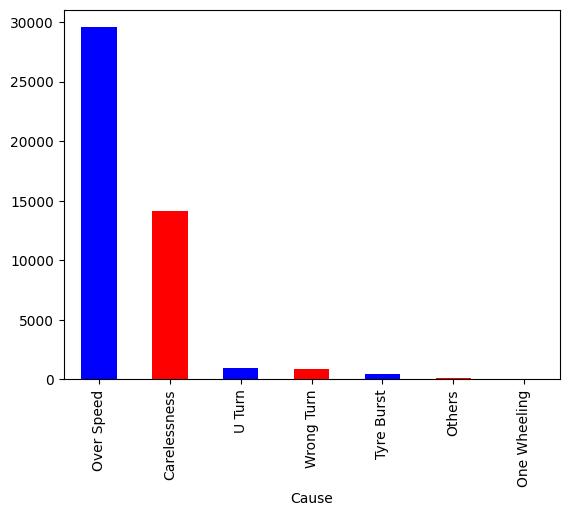

In [417]:
df['Cause'].value_counts().plot(kind='bar', color=['blue', 'red'])


plt.show()

###Cause Label Encoding

In [418]:
encoder = LabelEncoder()
df['Cause'] = encoder.fit_transform(df['Cause'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 46159 entries, 0 to 46188
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmergencyArea             46159 non-null  int64  
 1   TotalPatientsInEmergency  46159 non-null  object 
 2   Gender                    46159 non-null  object 
 3   Age                       46159 non-null  float64
 4   Reason                    46159 non-null  object 
 5   responsetime              46159 non-null  float64
 6   EducationTitle            46159 non-null  int64  
 7   InjuryType                46159 non-null  float64
 8   Cause                     46159 non-null  int64  
 9   BicycleInvovled           46159 non-null  float64
 10  BikesInvolved             46159 non-null  float64
 11  BusesInvolved             46159 non-null  float64
 12  CarsInvolved              46159 non-null  float64
 13  CartInvovled              46159 non-null  float64
 14  RickshawsIn

In [419]:
df['Cause'].value_counts()

,count
Cause,
29567,29567
14169,14169
933,933
841,841
481,481
104,104
64,64


###Cause Visualization Box plot


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


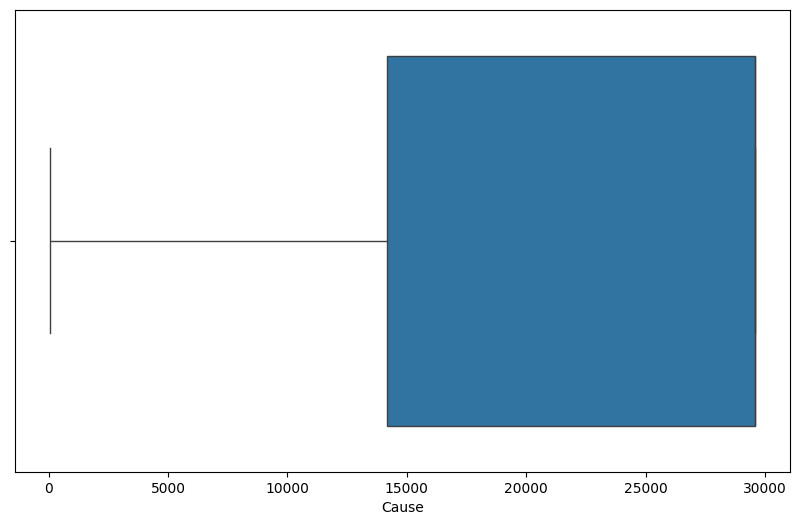

In [420]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Cause'])

plt.show()


In [421]:
Q1 = df['Cause'].quantile(0.25)
Q3 = df['Cause'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)

outliers = df[(df['Cause'] < lower_bound) | (df['Cause'] > upper_bound)]
outliers


,EmergencyArea,TotalPatientsInEmergency,Gender,Age,Reason,responsetime,EducationTitle,InjuryType,Cause,BicycleInvovled,BikesInvolved,BusesInvolved,CarsInvolved,CartInvovled,RickshawsInvolved,TractorInvovled,TrainsInvovled,TrucksInvolved,VansInvolved,OthersInvolved


###Cause Visualization Histogram


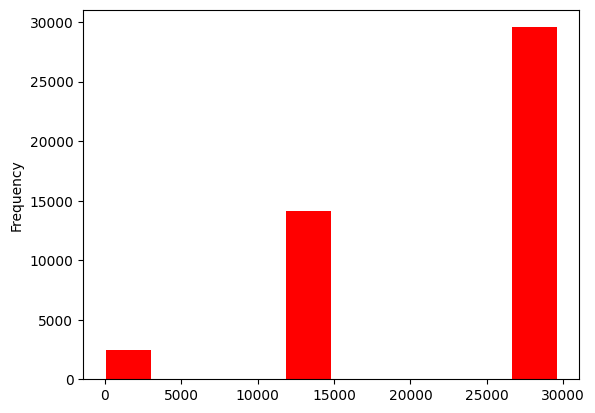

In [422]:
df['Cause'].plot(kind='hist', color=[ 'red'])
plt.show()

###info




```
For the Reason column, the frequency of each reason for an incident can also provide valuable insights. For example, if the reason is
"Driver Fatigue" (with a frequency of 85), it may be more associated with severe injuries compared to a less frequent reason like
"Pedestrian Error" (with a frequency of 8).

Given this, we will apply Frequency Encoding to the Reason column. This method will replace each unique reason with the
count of its occurrences in the dataset.
```






In [423]:
df['Reason'].value_counts()

,count
Reason,
same,2316
Same,1314
Bike Slipped,1223
Same,1012
Bike Slip,957
...,...
Car(FD-178 Honda Swift) Hitted the pedestrian due to over speed,1
Female motor bike pa jta hoa bike slipped hony ki wajhy sy garr gei(Rin 9043),1
Car hit another car (MRAG 734) (u4156),1


###Fill 'Same' data with forward fill

In [424]:
df['Reason'] = df['Reason'].replace(['Same', 'same','Same ','.'], pd.NA)

# Forward fill the NaN values with the value from the previous row
df['Reason'] = df['Reason'].fillna(method='ffill')

df['Reason'].value_counts()

<ipython-input-424-a33a3e5d415d>:4: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Reason'] = df['Reason'].fillna(method='ffill')


,count
Reason,
Bike Slipped,1330
Bike Slip,1039
Bike slipped,1018
bike slipped,522
Bike hit the Pedestrian and Runaway,409
...,...
Bike slipped due to over speed (RIK 3505)Honda CD 70,1
Bike slip due to over speed (RIO # 5990),1
Motor Bike no RIK-9123 super power hit the pedistarian bike Wala moka py moujoud tha,1


###Reason Encoding

In [425]:
encoder = LabelEncoder()
df['Reason'] = encoder.fit_transform(df['Reason'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 46159 entries, 0 to 46188
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmergencyArea             46159 non-null  int64  
 1   TotalPatientsInEmergency  46159 non-null  object 
 2   Gender                    46159 non-null  object 
 3   Age                       46159 non-null  float64
 4   Reason                    46159 non-null  int64  
 5   responsetime              46159 non-null  float64
 6   EducationTitle            46159 non-null  int64  
 7   InjuryType                46159 non-null  float64
 8   Cause                     46159 non-null  int64  
 9   BicycleInvovled           46159 non-null  float64
 10  BikesInvolved             46159 non-null  float64
 11  BusesInvolved             46159 non-null  float64
 12  CarsInvolved              46159 non-null  float64
 13  CartInvovled              46159 non-null  float64
 14  RickshawsIn

In [426]:
df['Reason'].value_counts()

,count
Reason,
1,19636
2,5670
3,1824
1330,1330
1039,1039
...,...
46,46
41,41
38,38


###Reason Visualization Histogram


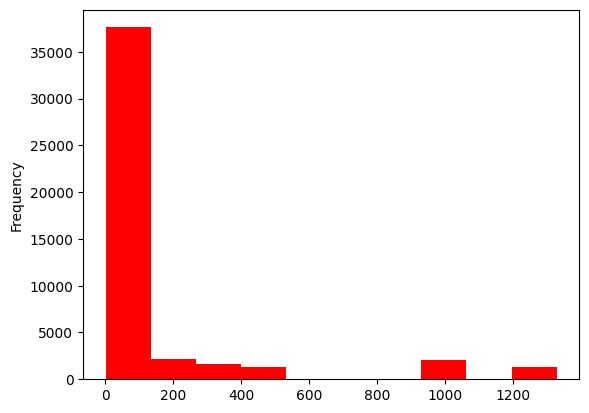

In [427]:
df['Reason'].plot(kind='hist', color=[ 'red'])
plt.show()

In [428]:
df['Gender'].value_counts()



,count
Gender,
Male,39768
Female,6389
Other,1
0,1


###Info

```
We utilize one-hot encoding for Gender and Injury Type due to the lack of a coherent ordinal relationship
among their values. This technique allows us to represent categorical variables as binary vectors, ensuring that
each category is treated independently.

```



###Gender Visualization Pie chart


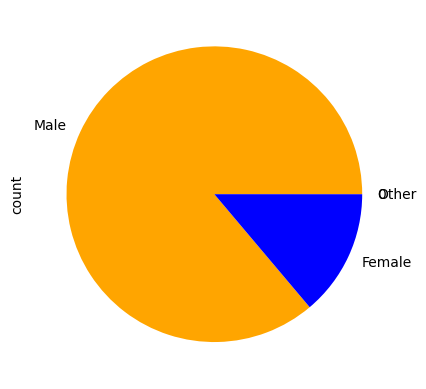

In [429]:
df['Gender'].value_counts().plot(kind='pie', colors=['orange', 'blue','purple'])
plt.show()

###Gender Visualization Bar chart


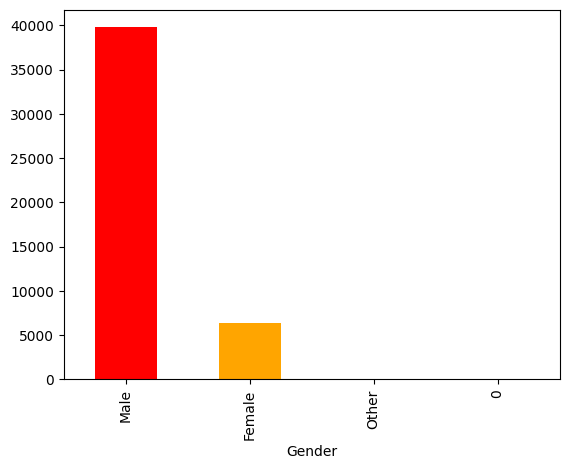

In [430]:
df['Gender'].value_counts().plot(kind='bar', color=['red', 'orange','purple'])
plt.show()

In [431]:
df['Gender'].value_counts()

,count
Gender,
Male,39768
Female,6389
Other,1
0,1


###Gender Label Encode

In [432]:
encoder = LabelEncoder()
df['Gender'] = encoder.fit_transform(df['Gender'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 46159 entries, 0 to 46188
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmergencyArea             46159 non-null  int64  
 1   TotalPatientsInEmergency  46159 non-null  object 
 2   Gender                    46159 non-null  int64  
 3   Age                       46159 non-null  float64
 4   Reason                    46159 non-null  int64  
 5   responsetime              46159 non-null  float64
 6   EducationTitle            46159 non-null  int64  
 7   InjuryType                46159 non-null  float64
 8   Cause                     46159 non-null  int64  
 9   BicycleInvovled           46159 non-null  float64
 10  BikesInvolved             46159 non-null  float64
 11  BusesInvolved             46159 non-null  float64
 12  CarsInvolved              46159 non-null  float64
 13  CartInvovled              46159 non-null  float64
 14  RickshawsIn

In [433]:
df['Gender'].value_counts()

,count
Gender,
2,39768
1,6389
3,1
0,1


###TotalPatientsInEmergency

In [440]:
#convert it into int data type
df['TotalPatientsInEmergency'] = df['TotalPatientsInEmergency'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 46158 entries, 0 to 46188
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmergencyArea             46158 non-null  int64  
 1   TotalPatientsInEmergency  46158 non-null  int64  
 2   Gender                    46158 non-null  int64  
 3   Age                       46158 non-null  float64
 4   Reason                    46158 non-null  int64  
 5   responsetime              46158 non-null  float64
 6   EducationTitle            46158 non-null  int64  
 7   InjuryType                46158 non-null  float64
 8   Cause                     46158 non-null  int64  
 9   BicycleInvovled           46158 non-null  float64
 10  BikesInvolved             46158 non-null  float64
 11  BusesInvolved             46158 non-null  float64
 12  CarsInvolved              46158 non-null  float64
 13  CartInvovled              46158 non-null  float64
 14  RickshawsIn

# **why we should do feature scalling after spliting dataset into train and test set?**

***Feature scaling should be performed after splitting the dataset into training and test sets to avoid data leakage and ensure fair model evaluation. If scaling is done before the split, information from the test set (like the mean or range of values) could influence the scaling process, which leads to overfitting and artificially inflated performance metrics. By scaling only the training data and applying the same transformation to the test set, the model is evaluated on truly unseen data, providing a more realistic measure of its generalization ability. This approach mimics real-world scenarios where future data must be scaled consistently with the training data.***

#Split Into Train and Test Sets

In [358]:
#Define the feature columns exclude  the target columns
feature_columns = df.columns.difference(df['InjuryType'])

#Create feature X and target Y
X = df[feature_columns]
Y = df['InjuryType']

#Perform train-test split (80% train, 20% test)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


In [359]:
X_train.head(2)

,Age,BicycleInvovled,BikesInvolved,BusesInvolved,CarsInvolved,CartInvovled,Cause,EducationTitle,EmergencyArea,Gender,InjuryType,OthersInvolved,Reason,RickshawsInvolved,TotalPatientsInEmergency,TractorInvovled,TrainsInvovled,TrucksInvolved,VansInvolved,responsetime
7034,20.0,0.0,2.0,0.0,0.0,0.0,29567,5,3,2,1.0,0.0,187,0.0,3,0.0,0.0,0.0,0.0,2.0
31078,29.0,0.0,1.0,0.0,1.0,0.0,29567,5,1,2,1.0,0.0,2,0.0,1,0.0,0.0,0.0,0.0,2.0


In [360]:
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"Y_train shape: {Y_train.shape}")
print(f"Y_test shape: {Y_test.shape}")

X_train shape: (36927, 20)
X_test shape: (9232, 20)
Y_train shape: (36927,)
Y_test shape: (9232,)


#Feature Scalling

##Info



```
Since we have not yet determined which model to use,
we cannot apply a specific method for feature scaling.
 Different models perform optimally with either normalization or standardization, so it is essential to identify the appropriate
 model before deciding on the most effective scaling technique.
```



###Standardization


In [361]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both train and test sets
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert scaled arrays back to DataFrames for easier handling (optional)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=feature_columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=feature_columns)



ValueError: could not convert string to float: 'Alive & unstable'

In [ ]:
X_train_scaled.head(2)

In [ ]:
X_test_scaled.head(2)

###Min-Max Scalling



In [ ]:
# Initialize the MinMaxScaler (default range is 0 to 1)
scaler = MinMaxScaler()

# Fit the scaler on the training data and transform both train and test sets
# The scaler is fit only on X_train to avoid data leakage from the test set
X_train_minmax = scaler.fit_transform(X_train)
X_test_minmax = scaler.transform(X_test)

# Convert normalized arrays back to DataFrames for easier handling (optional)
X_train_minmax = pd.DataFrame(X_train_minmax, columns=feature_columns)
X_test_minmax = pd.DataFrame(X_test_minmax, columns=feature_columns)



In [ ]:
X_train_minmax.head(2)

In [ ]:
X_test_minmax.head(2)

###Normalization

In [ ]:


# Initialize the Normalizer
normalizer = Normalizer()

# Normalize the data after imputation
X_train_normalized = normalizer.fit_transform(X_train)
X_test_normalized = normalizer.transform(X_test)

# Convert normalized arrays back to DataFrames for easier handling
X_train_normalized = pd.DataFrame(X_train_normalized, columns=feature_columns)
X_test_normalized = pd.DataFrame(X_test_normalized, columns=feature_columns)



In [ ]:
X_train_normalized.head(2)


In [ ]:
X_test_normalized.head(2)

#Visualization

##Histogram plot

In [ ]:
# Plot histograms for the standardized training set
X_train_scaled.hist(figsize=(16, 12), bins=20)
plt.suptitle("Histograms of Standardized Features")
plt.show()

#Model

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score

# Step 1: Initialize the KNN model
knn = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors

# Step 2: Train the KNN model on the training data
knn.fit(X_train_minmax, Y_train)

# Step 3: Make predictions on the test set
Y_pred = knn.predict(X_test_minmax)

# Step 4: Evaluate the model
print("Classification Report:\n", classification_report(Y_test, Y_pred))
print("Accuracy Score:", accuracy_score(Y_test, Y_pred))
